# 細節：
各區域餐廳名次排名(第一名20分、第二名19分...二十名1分)(直方圖)<br>
各區域餐廳名次排名(前五名店家較有影響力)(20,16,12,8,4、其餘0分)(直方圖)<br>
各區域餐廳名次排名(前三名店家較有影響力)(20,14,7、其餘0分)(直方圖)


In [53]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#視覺化圖表
import requests
from urllib.request import urlretrieve
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
warnings.filterwarnings('ignore')
####################讀取檔案####################
df_0331_0406 = pd.read_csv('weekly_0331~0406.csv')
df_0407_0413 = pd.read_csv('weekly_0407~0413.csv')
df_0414_0420 = pd.read_csv('weekly_0414~0420.csv')
df_0421_0427 = pd.read_csv('weekly_0421~0427.csv')
df_0428_0504 = pd.read_csv('weekly_0428~0504.csv')
#df_0505_0511 = pd.read_csv('weekly_0505~0511.csv')
#df_0512_0518 = pd.read_csv('weekly_0512~0518.csv')
#df_0519_0525 = pd.read_csv('weekly_0519~0525.csv')
#df_0526_0601 = pd.read_csv('weekly_0526~0601.csv')
df_03 = pd.read_csv('monthly_03.csv')
df_04 = pd.read_csv('monthly_04.csv')
#df_05 = pd.read_csv('monthly_05.csv')

####################資料處理####################0331_0406
rating_mean = "%.1f" % df_0331_0406.loc[df_0331_0406['評級'] != "無紀錄",'評級'].astype("float64").mean()
df_0331_0406['評級'][13] = df_0331_0406['評級'][13].replace("無紀錄", rating_mean)
df_0331_0406['評級'][16] = df_0331_0406['評級'][16].replace("無紀錄", str(round(float(rating_mean)*0.95,1)))
for i in range(0,20):
    df_0331_0406['多少人來過'][i] = df_0331_0406['多少人來過'][i].replace("人來過", "")
visit_mean = "%.1f" % df_0331_0406.loc[df_0331_0406['多少人來過'] != "無紀錄",'多少人來過'].astype("float64").mean()
df_0331_0406['多少人來過'][13] = df_0331_0406['多少人來過'][13].replace("無紀錄", str(round(float(visit_mean))))
for i in range(0,20):
    df_0331_0406['多少篇食記'][i] = df_0331_0406['多少篇食記'][i].replace("篇食記", "")
visit_mean = "%.1f" % df_0331_0406.loc[df_0331_0406['多少篇食記'] != "無紀錄",'多少篇食記'].astype("float64").mean()
df_0331_0406['多少篇食記'][13] = df_0331_0406['多少篇食記'][13].replace("無紀錄", str(round(float(visit_mean))))
#print(df_0331_0406)

####################資料處理####################0407_0413
rating_mean = "%.1f" % df_0407_0413.loc[df_0407_0413['評級'] != "無紀錄",'評級'].astype("float64").mean()
df_0407_0413['評級'][1] = df_0407_0413['評級'][1].replace("無紀錄", str(round(float(rating_mean)*1.05,1)))
df_0407_0413['評級'][3] = df_0407_0413['評級'][3].replace("無紀錄", str(round(float(rating_mean)*1.05,1)))
df_0407_0413['評級'][15] = df_0407_0413['評級'][15].replace("無紀錄", str(round(float(rating_mean)*0.95,1)))
df_0407_0413['評級'][18] = df_0407_0413['評級'][18].replace("無紀錄", str(round(float(rating_mean)*0.95,1)))
df_0407_0413['評級'][19] = df_0407_0413['評級'][19].replace("無紀錄", str(round(float(rating_mean)*0.95,1)))
for i in range(0,20):
    df_0407_0413['多少人來過'][i] = df_0407_0413['多少人來過'][i].replace("人來過", "")
for i in range(0,20):
    df_0407_0413['多少篇食記'][i] = df_0407_0413['多少篇食記'][i].replace("篇食記", "")
#print(df_0407_0413)

####################資料處理####################0414_0420
rating_mean = "%.1f" % df_0414_0420.loc[df_0414_0420['評級'] != "無紀錄",'評級'].astype("float64").mean()
df_0414_0420['評級'][3] = df_0414_0420['評級'][3].replace("無紀錄", str(round(float(rating_mean)*1.05,1)))
df_0414_0420['評級'][16] = df_0414_0420['評級'][16].replace("無紀錄", str(round(float(rating_mean)*0.95,1)))
df_0414_0420['評級'][19] = df_0414_0420['評級'][16].replace("無紀錄", str(round(float(rating_mean)*0.95,1)))
for i in range(0,20):
    df_0414_0420['多少人來過'][i] = df_0414_0420['多少人來過'][i].replace("人來過", "")
visit_mean = "%.1f" % df_0414_0420.loc[df_0414_0420['多少人來過'] != "無紀錄",'多少人來過'].astype("float64").mean()
df_0414_0420['多少人來過'][19] = df_0414_0420['多少人來過'][19].replace("無紀錄", str(int(float(visit_mean)*0.8)))
for i in range(0,20):
    df_0414_0420['多少篇食記'][i] = df_0414_0420['多少篇食記'][i].replace("篇食記", "")
visit_mean = "%.1f" % df_0414_0420.loc[df_0414_0420['多少篇食記'] != "無紀錄",'多少篇食記'].astype("float64").mean()
df_0414_0420['多少篇食記'][19] = df_0414_0420['多少篇食記'][19].replace("無紀錄", str(int(float(visit_mean)*0.8)))
#print(df_0414_0420)

####################資料處理####################0421_0427
rating_mean = "%.1f" % df_0421_0427.loc[df_0421_0427['評級'] != "無紀錄",'評級'].astype("float64").mean()
df_0421_0427['評級'][2] = df_0421_0427['評級'][2].replace("無紀錄", str(round(float(rating_mean)*1.05,1)))
df_0421_0427['評級'][5] = df_0421_0427['評級'][5].replace("無紀錄", str(round(float(rating_mean)*1.05,1)))
df_0421_0427['評級'][17] = df_0421_0427['評級'][17].replace("無紀錄", str(round(float(rating_mean)*0.95,1)))
df_0421_0427['評級'][18] = df_0421_0427['評級'][18].replace("無紀錄", str(round(float(rating_mean)*0.95,1)))
for i in range(0,20):
    df_0421_0427['多少人來過'][i] = df_0421_0427['多少人來過'][i].replace("人來過", "")
for i in range(0,20):
    df_0421_0427['多少篇食記'][i] = df_0421_0427['多少篇食記'][i].replace("篇食記", "")
#print(df_0421_0427)

####################資料處理####################0428_0504
rating_mean = "%.1f" % df_0428_0504.loc[df_0428_0504['評級'] != "無紀錄",'評級'].astype("float64").mean()
df_0428_0504['評級'][4] = df_0428_0504['評級'][4].replace("無紀錄", str(round(float(rating_mean)*1.05,1)))
df_0428_0504['評級'][5] = df_0428_0504['評級'][5].replace("無紀錄", str(round(float(rating_mean)*1.05,1)))
for i in range(0,20):
    df_0428_0504['多少人來過'][i] = df_0428_0504['多少人來過'][i].replace("人來過", "")
for i in range(0,20):
    df_0428_0504['多少篇食記'][i] = df_0428_0504['多少篇食記'][i].replace("篇食記", "")
#print(df_0428_0504)

####################資料處理####################0505_0511

####################資料處理####################0512_0518

####################資料處理####################0519_0525

####################資料處理####################0526_0601

####################資料處理####################03
rating_mean = "%.1f" % df_03.loc[df_03['評級'] != "無紀錄",'評級'].astype("float64").mean()
df_03['評級'][2] = df_03['評級'][2].replace("無紀錄", str(round(float(rating_mean)*1.05,1)))
df_03['評級'][11] = df_03['評級'][11].replace("無紀錄", rating_mean)
for i in range(0,20):
    df_03['多少人來過'][i] = df_03['多少人來過'][i].replace("人來過", "")
visit_mean = "%.1f" % df_03.loc[df_03['多少人來過'] != "無紀錄",'多少人來過'].astype("float64").mean()
df_03['多少人來過'][11] = df_03['多少人來過'][11].replace("無紀錄", str(round(float(visit_mean))))
for i in range(0,20):
    df_03['多少篇食記'][i] = df_03['多少篇食記'][i].replace("篇食記", "")
visit_mean = "%.1f" % df_03.loc[df_03['多少篇食記'] != "無紀錄",'多少篇食記'].astype("float64").mean()
df_03['多少篇食記'][11] = df_03['多少篇食記'][11].replace("無紀錄", str(round(float(visit_mean))))
#print(df_03)

####################資料處理####################04
rating_mean = "%.1f" % df_04.loc[df_04['評級'] != "無紀錄",'評級'].astype("float64").mean()
df_04['評級'][5] = df_04['評級'][2].replace("無紀錄", str(round(float(rating_mean)*1.05,1)))
df_04['評級'][11] = df_04['評級'][11].replace("無紀錄", rating_mean)
df_04['評級'][12] = df_04['評級'][12].replace("無紀錄", rating_mean)
for i in range(0,20):
    df_04['多少人來過'][i] = df_04['多少人來過'][i].replace("人來過", "")
for i in range(0,20):
    df_04['多少篇食記'][i] = df_04['多少篇食記'][i].replace("篇食記", "")
#print(df_04)

####################資料處理####################05


########################################
#0331_0406
#0407_0413
#0414_0420
#0421_0427
#0428_0504
#0505_0511
#0512_0518
#0519_0525
#0526_0601
#03
#04
#05

#print(df_0331_0406.loc[df_0331_0406['評級'] == "無紀錄",'評級'].values[0])#某個row的值
#print(df_0331_0406[df_0331_0406['評級'] == "無紀錄"].index.tolist()[0])#列出目標是在哪個row
#print(df_0331_0406.iloc[:,3])#取出該column的所有row


In [54]:
#將獲得的index值+1轉化成排名
def index_to_ranking(x):
    return x+1

In [55]:
#將獲得的排名轉化成分數(第一名20分、第二名19分...二十名1分)
def ranking_to_points(y20):
    return abs(y20-21)
#將獲得的排名轉化成分數(前五名店家較有影響力)(20,16,12,8,4、其餘0分)
def ranking_to_Top5(y5):
    return abs(y5-21) if(y5==1)else abs(y5-18) if(y5==2)else abs(y5-15) if(y5==3)else abs(y5-12) if(y5==4)else abs(y5-9) if(y5==5)else 0
#將獲得的排名轉化成分數(前三名店家較有影響力)(20,14,7、其餘0分)
def ranking_to_Top3(y3):
    return abs(y3-21) if(y3==1)else abs(y3-16) if(y3==2)else abs(y3-10) if(y3==3)else 0

In [56]:
#透過str當中的int進行排序(圖表無法排序)
import re
def natural_key(string_):
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_)]

# 各區域餐廳名次排名(第一名20分、第二名19分...二十名1分)：

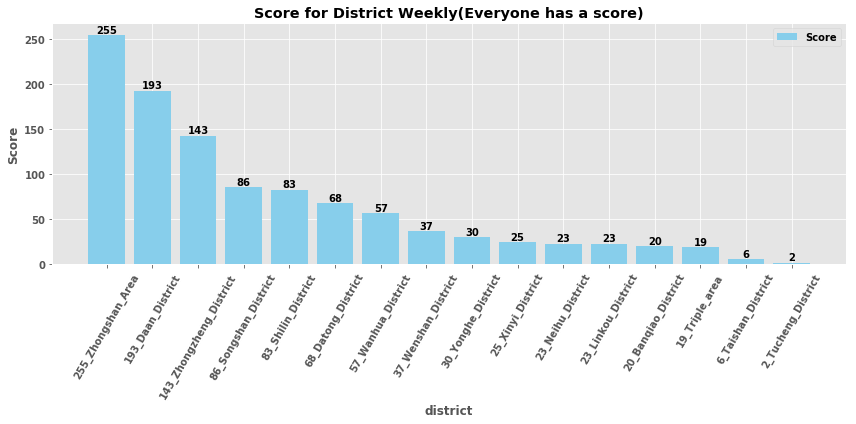

'\n0505_0511\n0512_0518\n0519_0525\n0526_0601\n'

In [57]:
####################視覺化圖表####################
####################細節：每週各區域餐廳名次排名(第一名20分、第二名19分...二十名1分)####################

#print(df_0331_0406['美食所在區域'].value_counts())
#print(df_0407_0413['美食所在區域'].value_counts())
#print(df_0414_0420['美食所在區域'].value_counts())
#print(df_0421_0427['美食所在區域'].value_counts())
#print(df_0428_0504['美食所在區域'].value_counts())
##print(df_0505_0511['美食所在區域'].value_counts())
##print(df_0512_0518['美食所在區域'].value_counts())
##print(df_0519_0525['美食所在區域'].value_counts())
##print(df_0526_0601['美食所在區域'].value_counts())

####################取出同一區域所有名次####################
weekly_rating_0331_0406_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "大安區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "中山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Datong_District = pd.DataFrame({'Datong_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "大同區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Songshan_District = pd.DataFrame({'Songshan_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "松山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Yonghe_District = pd.DataFrame({'Yonghe_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "永和區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Shilin_District = pd.DataFrame({'Shilin_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "士林區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Banqiao_District = pd.DataFrame({'Banqiao_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "板橋區"]['評級'].to_frame().index.tolist())))))]})

weekly_rating_0407_0413_district_Shilin_District = pd.DataFrame({'Shilin_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "士林區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "中山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Triple_area = pd.DataFrame({'Triple_area':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "三重區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Xinyi_District = pd.DataFrame({'Xinyi_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "信義區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "大安區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Wanhua_District = pd.DataFrame({'Wanhua_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "萬華區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Datong_District = pd.DataFrame({'Datong_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "大同區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Yonghe_District = pd.DataFrame({'Yonghe_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "永和區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Tucheng_District = pd.DataFrame({'Tucheng_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "土城區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Banqiao_District = pd.DataFrame({'Banqiao_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "板橋區"]['評級'].to_frame().index.tolist())))))]})

weekly_rating_0414_0420_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "中山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0414_0420_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "大安區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0414_0420_district_Songshan_District = pd.DataFrame({'Songshan_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "松山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0414_0420_district_Shilin_District = pd.DataFrame({'Shilin_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "士林區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0414_0420_district_Wanhua_District = pd.DataFrame({'Wanhua_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "萬華區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0414_0420_district_Datong_District = pd.DataFrame({'Datong_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "大同區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0414_0420_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})

weekly_rating_0421_0427_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Datong_District = pd.DataFrame({'Datong_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Songshan_District = pd.DataFrame({'Songshan_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Neihu_District = pd.DataFrame({'Neihu_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Shilin_District = pd.DataFrame({'Shilin_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Wanhua_District = pd.DataFrame({'Wanhua_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Linkou_District = pd.DataFrame({'Linkou_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Wenshan_District = pd.DataFrame({'Wenshan_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})

weekly_rating_0428_0504_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "大安區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "中山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Songshan_District = pd.DataFrame({'Songshan_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "松山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Datong_District = pd.DataFrame({'Datong_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "大同區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Xinyi_District = pd.DataFrame({'Xinyi_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "信義區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Taishan_District = pd.DataFrame({'Taishan_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "泰山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Shilin_District = pd.DataFrame({'Shilin_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "士林區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Wenshan_District = pd.DataFrame({'Wenshan_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "文山區"]['評級'].to_frame().index.tolist())))))]})

###################將同一區域的所有名次整合起來####################
weekly_rating_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':pd.concat([weekly_rating_0331_0406_district_Zhongzheng_District,weekly_rating_0407_0413_district_Zhongzheng_District,weekly_rating_0414_0420_district_Zhongzheng_District,weekly_rating_0421_0427_district_Zhongzheng_District,weekly_rating_0428_0504_district_Zhongzheng_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Shilin_District = pd.DataFrame({'Shilin_District':pd.concat([weekly_rating_0331_0406_district_Shilin_District,weekly_rating_0407_0413_district_Shilin_District,weekly_rating_0414_0420_district_Shilin_District,weekly_rating_0421_0427_district_Shilin_District,weekly_rating_0428_0504_district_Shilin_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':pd.concat([weekly_rating_0331_0406_district_Zhongshan_Area,weekly_rating_0407_0413_district_Zhongshan_Area,weekly_rating_0414_0420_district_Zhongshan_Area,weekly_rating_0421_0427_district_Zhongshan_Area,weekly_rating_0428_0504_district_Zhongshan_Area],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Datong_District = pd.DataFrame({'Datong_District':pd.concat([weekly_rating_0331_0406_district_Datong_District,weekly_rating_0407_0413_district_Datong_District,weekly_rating_0414_0420_district_Datong_District,weekly_rating_0421_0427_district_Datong_District,weekly_rating_0428_0504_district_Datong_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Daan_District = pd.DataFrame({'Daan_District':pd.concat([weekly_rating_0331_0406_district_Daan_District,weekly_rating_0407_0413_district_Daan_District,weekly_rating_0414_0420_district_Daan_District,weekly_rating_0421_0427_district_Daan_District,weekly_rating_0428_0504_district_Daan_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Songshan_District = pd.DataFrame({'Songshan_District':pd.concat([weekly_rating_0331_0406_district_Songshan_District,weekly_rating_0414_0420_district_Songshan_District,weekly_rating_0421_0427_district_Songshan_District,weekly_rating_0428_0504_district_Songshan_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Wanhua_District = pd.DataFrame({'Wanhua_District':pd.concat([weekly_rating_0407_0413_district_Wanhua_District,weekly_rating_0414_0420_district_Wanhua_District,weekly_rating_0421_0427_district_Wanhua_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Xinyi_District = pd.DataFrame({'Xinyi_District':pd.concat([weekly_rating_0407_0413_district_Xinyi_District,weekly_rating_0428_0504_district_Xinyi_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Yonghe_District = pd.DataFrame({'Yonghe_District':pd.concat([weekly_rating_0331_0406_district_Yonghe_District,weekly_rating_0407_0413_district_Yonghe_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Wenshan_District = pd.DataFrame({'Wenshan_District':pd.concat([weekly_rating_0421_0427_district_Wenshan_District,weekly_rating_0428_0504_district_Wenshan_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Banqiao_District = pd.DataFrame({'Banqiao_District':pd.concat([weekly_rating_0331_0406_district_Banqiao_District,weekly_rating_0407_0413_district_Banqiao_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Neihu_District = pd.DataFrame({'Neihu_District':pd.concat([weekly_rating_0421_0427_district_Neihu_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Triple_area = pd.DataFrame({'Triple_area':pd.concat([weekly_rating_0407_0413_district_Triple_area],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Tucheng_District = pd.DataFrame({'Tucheng_District':pd.concat([weekly_rating_0407_0413_district_Tucheng_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Taishan_District = pd.DataFrame({'Taishan_District':pd.concat([weekly_rating_0428_0504_district_Taishan_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Linkou_District = pd.DataFrame({'Linkou_District':pd.concat([weekly_rating_0421_0427_district_Linkou_District],ignore_index=True).cumsum().values[-1]})

data = [int(weekly_rating_district_Zhongzheng_District['Zhongzheng_District'].values),int(weekly_rating_district_Shilin_District['Shilin_District'].values),int(weekly_rating_district_Zhongshan_Area['Zhongshan_Area'].values),int(weekly_rating_district_Datong_District['Datong_District'].values),int(weekly_rating_district_Daan_District['Daan_District'].values),int(weekly_rating_district_Songshan_District['Songshan_District'].values),int(weekly_rating_district_Wanhua_District['Wanhua_District'].values),int(weekly_rating_district_Xinyi_District['Xinyi_District'].values),int(weekly_rating_district_Yonghe_District['Yonghe_District'].values),int(weekly_rating_district_Wenshan_District['Wenshan_District'].values),int(weekly_rating_district_Banqiao_District['Banqiao_District'].values),int(weekly_rating_district_Neihu_District['Neihu_District'].values),int(weekly_rating_district_Triple_area['Triple_area'].values),int(weekly_rating_district_Tucheng_District['Tucheng_District'].values),int(weekly_rating_district_Taishan_District['Taishan_District'].values),int(weekly_rating_district_Linkou_District['Linkou_District'].values)]
labels = ['Zhongzheng_District','Shilin_District','Zhongshan_Area','Datong_District','Daan_District','Songshan_District','Wanhua_District','Xinyi_District','Yonghe_District','Wenshan_District','Banqiao_District','Neihu_District','Triple_area','Tucheng_District','Taishan_District','Linkou_District']
for i in range(0,len(data)):labels[i] = str(data[i])+"_"+str(labels[i])
labels = sorted(labels,key=natural_key,reverse = True)
data = sorted(data,reverse = True)
xlabellen = np.arange(len(data))

fig, ax = plt.subplots(figsize=(12,6))
plotbar = ax.bar(xlabellen,data, color='SkyBlue', label='Score')
for rect in plotbar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
ax.set_title('Score for District Weekly(Everyone has a score)')
ax.set_xlabel('district')
ax.set_ylabel('Score')
ax.set_xticks(xlabellen)
ax.set_xticklabels(labels,rotation=60)
ax.legend()
plt.tight_layout()
plt.show()

'''0331_0406
大安區 Daan_District
中正區 Zhongzheng_District
中山區 Zhongshan_Area
大同區 Datong_District
松山區 Songshan_District
永和區 Yonghe_District
士林區 Shilin_District
板橋區 Banqiao_District
'''
'''0407_0413
士林區 Shilin_District
中山區 Zhongshan_Area
三重區 Triple_area
信義區 Xinyi_District
大安區 Daan_District
萬華區 Wanhua_District
中正區 Zhongzheng_District
大同區 Datong_District
永和區 Yonghe_District
土城區 Tucheng_District
板橋區 Banqiao_District
'''
'''0414_0420
中山區 Zhongshan_Area
大安區 Daan_District
松山區 Songshan_District
士林區 Shilin_District
萬華區 Wanhua_District
大同區 Datong_District
中正區 Zhongzheng_District
'''
'''0421_0427
中山區 Zhongshan_Area
大同區 Datong_District
大安區 Daan_District
中正區 Zhongzheng_District
松山區 Songshan_District
內湖區 Neihu_District
士林區 Shilin_District
萬華區 Wanhua_District
林口區 Linkou_District
文山區 Wenshan_District
'''
'''0428_0504
大安區 Daan_District
中山區 Zhongshan_Area
松山區 Songshan_District
大同區 Datong_District
信義區 Xinyi_District
泰山區 Taishan_District
士林區 Shilin_District
中正區 Zhongzheng_District
文山區 Wenshan_District
'''
'''
0505_0511
0512_0518
0519_0525
0526_0601
'''


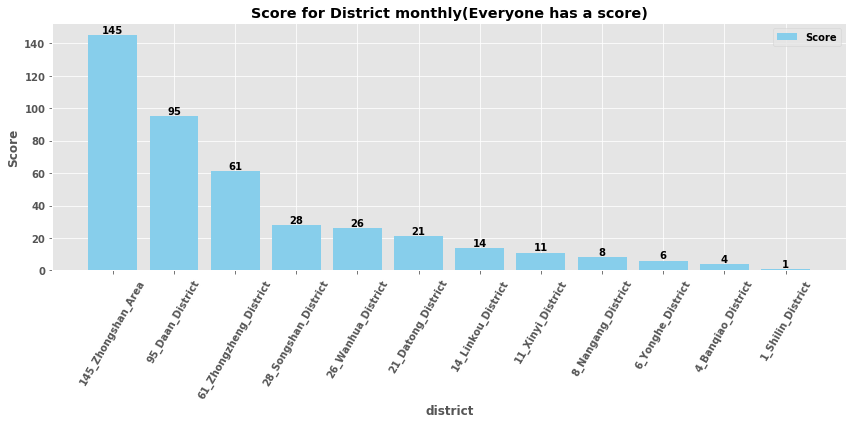

'05\n\n'

In [58]:
####################視覺化圖表####################
####################細節：每月各區域餐廳名次排名(第一名20分、第二名19分...二十名1分)####################

#print(df_03['美食所在區域'].value_counts())
#print(df_04['美食所在區域'].value_counts())
#print(df_05['美食所在區域'].value_counts())

####################取出同一區域所有名次####################
monthly_rating_03_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "中山區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_03_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "大安區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_03_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_03_district_Wanhua_District = pd.DataFrame({'Wanhua_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "萬華區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_03_district_Songshan_District = pd.DataFrame({'Songshan_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "松山區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_03_district_Nangang_District = pd.DataFrame({'Nangang_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "南港區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_03_district_Xinyi_District = pd.DataFrame({'Xinyi_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "信義區"]['評級'].to_frame().index.tolist())))))]})

monthly_rating_04_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "中山區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "大安區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Datong_District = pd.DataFrame({'Datong_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "大同區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Songshan_District = pd.DataFrame({'Songshan_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "松山區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Shilin_District = pd.DataFrame({'Shilin_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "士林區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Linkou_District = pd.DataFrame({'Linkou_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "林口區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Yonghe_District = pd.DataFrame({'Yonghe_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "永和區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Banqiao_District = pd.DataFrame({'Banqiao_District':[sum(list(map(ranking_to_points,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "板橋區"]['評級'].to_frame().index.tolist())))))]})

####################將同一區域的所有名次整合起來####################
monthly_rating_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':pd.concat([monthly_rating_03_district_Zhongzheng_District,monthly_rating_04_district_Zhongzheng_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Daan_District = pd.DataFrame({'Daan_District':pd.concat([monthly_rating_03_district_Daan_District,monthly_rating_04_district_Daan_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Songshan_District = pd.DataFrame({'Songshan_District':pd.concat([monthly_rating_03_district_Songshan_District,monthly_rating_04_district_Songshan_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':pd.concat([monthly_rating_03_district_Zhongshan_Area,monthly_rating_04_district_Zhongshan_Area],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Yonghe_District = pd.DataFrame({'Yonghe_District':pd.concat([monthly_rating_04_district_Yonghe_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Datong_District = pd.DataFrame({'Datong_District':pd.concat([monthly_rating_04_district_Datong_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Linkou_District = pd.DataFrame({'Linkou_District':pd.concat([monthly_rating_04_district_Linkou_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Nangang_District = pd.DataFrame({'Nangang_District':pd.concat([monthly_rating_03_district_Nangang_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Xinyi_District = pd.DataFrame({'Xinyi_District':pd.concat([monthly_rating_03_district_Xinyi_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Shilin_District = pd.DataFrame({'Shilin_District':pd.concat([monthly_rating_04_district_Shilin_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Wanhua_District = pd.DataFrame({'Wanhua_District':pd.concat([monthly_rating_03_district_Wanhua_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Banqiao_District = pd.DataFrame({'Banqiao_District':pd.concat([monthly_rating_04_district_Banqiao_District],ignore_index=True).cumsum().values[-1]})

data = [int(monthly_rating_district_Zhongzheng_District['Zhongzheng_District'].values),int(monthly_rating_district_Daan_District['Daan_District'].values),int(monthly_rating_district_Songshan_District['Songshan_District'].values),int(monthly_rating_district_Zhongshan_Area['Zhongshan_Area'].values),int(monthly_rating_district_Yonghe_District['Yonghe_District'].values),int(monthly_rating_district_Datong_District['Datong_District'].values),int(monthly_rating_district_Linkou_District['Linkou_District'].values),int(monthly_rating_district_Nangang_District['Nangang_District'].values),int(monthly_rating_district_Xinyi_District['Xinyi_District'].values),int(monthly_rating_district_Shilin_District['Shilin_District'].values),int(monthly_rating_district_Wanhua_District['Wanhua_District'].values),int(monthly_rating_district_Banqiao_District['Banqiao_District'].values)]
labels = ['Zhongzheng_District','Daan_District','Songshan_District','Zhongshan_Area','Yonghe_District','Datong_District','Linkou_District','Nangang_District','Xinyi_District','Shilin_District','Wanhua_District','Banqiao_District']
for i in range(0,len(data)):labels[i] = str(data[i])+"_"+str(labels[i])
labels = sorted(labels,key=natural_key,reverse = True)
data = sorted(data,reverse = True)
xlabellen = np.arange(len(data))

fig, ax = plt.subplots(figsize=(12,6))
plotbar = ax.bar(xlabellen,data, color='SkyBlue', label='Score')
for rect in plotbar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
ax.set_title('Score for District monthly(Everyone has a score)')
ax.set_xlabel('district')
ax.set_ylabel('Score')
ax.set_xticks(xlabellen)
ax.set_xticklabels(labels,rotation=60)
ax.legend()
plt.tight_layout()
plt.show()

'''03
中山區 Zhongshan_Area
大安區 Daan_District
中正區 Zhongzheng_District
萬華區 Wanhua_District
松山區 Songshan_District
南港區 Nangang_District
信義區 Xinyi_District
'''
'''04
中山區 Zhongshan_Area
大安區 Daan_District
中正區 Zhongzheng_District
大同區 Datong_District
松山區 Songshan_District
士林區 Shilin_District
林口區 Linkou_District
永和區 Yonghe_District
板橋區 Banqiao_District
'''
'''05

'''


# 各區域餐廳名次排名(前五名店家較有影響力)(20,16,12,8,4、其餘0分)：

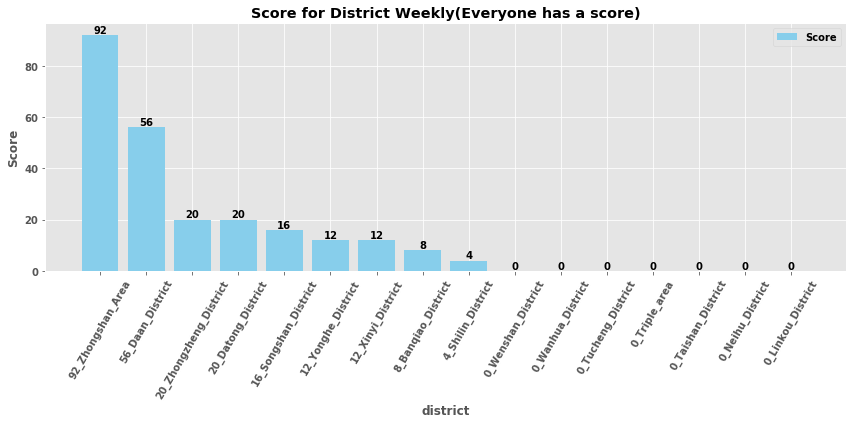

'\n0505_0511\n0512_0518\n0519_0525\n0526_0601\n'

In [59]:
####################視覺化圖表####################
####################細節：每週各區域餐廳名次排名(前五名店家較有影響力)(20,16,12,8,4、其餘0分)####################

#print(df_0331_0406['美食所在區域'].value_counts())
#print(df_0407_0413['美食所在區域'].value_counts())
#print(df_0414_0420['美食所在區域'].value_counts())
#print(df_0421_0427['美食所在區域'].value_counts())
#print(df_0428_0504['美食所在區域'].value_counts())
##print(df_0505_0511['美食所在區域'].value_counts())
##print(df_0512_0518['美食所在區域'].value_counts())
##print(df_0519_0525['美食所在區域'].value_counts())
##print(df_0526_0601['美食所在區域'].value_counts())

####################取出同一區域所有名次####################
weekly_rating_0331_0406_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "大安區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "中山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Datong_District = pd.DataFrame({'Datong_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "大同區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Songshan_District = pd.DataFrame({'Songshan_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "松山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Yonghe_District = pd.DataFrame({'Yonghe_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "永和區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Shilin_District = pd.DataFrame({'Shilin_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "士林區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Banqiao_District = pd.DataFrame({'Banqiao_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "板橋區"]['評級'].to_frame().index.tolist())))))]})

weekly_rating_0407_0413_district_Shilin_District = pd.DataFrame({'Shilin_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "士林區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "中山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Triple_area = pd.DataFrame({'Triple_area':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "三重區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Xinyi_District = pd.DataFrame({'Xinyi_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "信義區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "大安區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Wanhua_District = pd.DataFrame({'Wanhua_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "萬華區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Datong_District = pd.DataFrame({'Datong_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "大同區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Yonghe_District = pd.DataFrame({'Yonghe_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "永和區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Tucheng_District = pd.DataFrame({'Tucheng_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "土城區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Banqiao_District = pd.DataFrame({'Banqiao_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "板橋區"]['評級'].to_frame().index.tolist())))))]})

weekly_rating_0414_0420_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "中山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0414_0420_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "大安區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0414_0420_district_Songshan_District = pd.DataFrame({'Songshan_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "松山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0414_0420_district_Shilin_District = pd.DataFrame({'Shilin_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "士林區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0414_0420_district_Wanhua_District = pd.DataFrame({'Wanhua_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "萬華區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0414_0420_district_Datong_District = pd.DataFrame({'Datong_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "大同區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0414_0420_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})

weekly_rating_0421_0427_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Datong_District = pd.DataFrame({'Datong_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Songshan_District = pd.DataFrame({'Songshan_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Neihu_District = pd.DataFrame({'Neihu_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Shilin_District = pd.DataFrame({'Shilin_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Wanhua_District = pd.DataFrame({'Wanhua_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Linkou_District = pd.DataFrame({'Linkou_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Wenshan_District = pd.DataFrame({'Wenshan_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})

weekly_rating_0428_0504_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "大安區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "中山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Songshan_District = pd.DataFrame({'Songshan_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "松山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Datong_District = pd.DataFrame({'Datong_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "大同區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Xinyi_District = pd.DataFrame({'Xinyi_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "信義區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Taishan_District = pd.DataFrame({'Taishan_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "泰山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Shilin_District = pd.DataFrame({'Shilin_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "士林區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Wenshan_District = pd.DataFrame({'Wenshan_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "文山區"]['評級'].to_frame().index.tolist())))))]})

###################將同一區域的所有名次整合起來####################
weekly_rating_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':pd.concat([weekly_rating_0331_0406_district_Zhongzheng_District,weekly_rating_0407_0413_district_Zhongzheng_District,weekly_rating_0414_0420_district_Zhongzheng_District,weekly_rating_0421_0427_district_Zhongzheng_District,weekly_rating_0428_0504_district_Zhongzheng_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Shilin_District = pd.DataFrame({'Shilin_District':pd.concat([weekly_rating_0331_0406_district_Shilin_District,weekly_rating_0407_0413_district_Shilin_District,weekly_rating_0414_0420_district_Shilin_District,weekly_rating_0421_0427_district_Shilin_District,weekly_rating_0428_0504_district_Shilin_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':pd.concat([weekly_rating_0331_0406_district_Zhongshan_Area,weekly_rating_0407_0413_district_Zhongshan_Area,weekly_rating_0414_0420_district_Zhongshan_Area,weekly_rating_0421_0427_district_Zhongshan_Area,weekly_rating_0428_0504_district_Zhongshan_Area],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Datong_District = pd.DataFrame({'Datong_District':pd.concat([weekly_rating_0331_0406_district_Datong_District,weekly_rating_0407_0413_district_Datong_District,weekly_rating_0414_0420_district_Datong_District,weekly_rating_0421_0427_district_Datong_District,weekly_rating_0428_0504_district_Datong_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Daan_District = pd.DataFrame({'Daan_District':pd.concat([weekly_rating_0331_0406_district_Daan_District,weekly_rating_0407_0413_district_Daan_District,weekly_rating_0414_0420_district_Daan_District,weekly_rating_0421_0427_district_Daan_District,weekly_rating_0428_0504_district_Daan_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Songshan_District = pd.DataFrame({'Songshan_District':pd.concat([weekly_rating_0331_0406_district_Songshan_District,weekly_rating_0414_0420_district_Songshan_District,weekly_rating_0421_0427_district_Songshan_District,weekly_rating_0428_0504_district_Songshan_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Wanhua_District = pd.DataFrame({'Wanhua_District':pd.concat([weekly_rating_0407_0413_district_Wanhua_District,weekly_rating_0414_0420_district_Wanhua_District,weekly_rating_0421_0427_district_Wanhua_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Xinyi_District = pd.DataFrame({'Xinyi_District':pd.concat([weekly_rating_0407_0413_district_Xinyi_District,weekly_rating_0428_0504_district_Xinyi_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Yonghe_District = pd.DataFrame({'Yonghe_District':pd.concat([weekly_rating_0331_0406_district_Yonghe_District,weekly_rating_0407_0413_district_Yonghe_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Wenshan_District = pd.DataFrame({'Wenshan_District':pd.concat([weekly_rating_0421_0427_district_Wenshan_District,weekly_rating_0428_0504_district_Wenshan_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Banqiao_District = pd.DataFrame({'Banqiao_District':pd.concat([weekly_rating_0331_0406_district_Banqiao_District,weekly_rating_0407_0413_district_Banqiao_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Neihu_District = pd.DataFrame({'Neihu_District':pd.concat([weekly_rating_0421_0427_district_Neihu_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Triple_area = pd.DataFrame({'Triple_area':pd.concat([weekly_rating_0407_0413_district_Triple_area],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Tucheng_District = pd.DataFrame({'Tucheng_District':pd.concat([weekly_rating_0407_0413_district_Tucheng_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Taishan_District = pd.DataFrame({'Taishan_District':pd.concat([weekly_rating_0428_0504_district_Taishan_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Linkou_District = pd.DataFrame({'Linkou_District':pd.concat([weekly_rating_0421_0427_district_Linkou_District],ignore_index=True).cumsum().values[-1]})

data = [int(weekly_rating_district_Zhongzheng_District['Zhongzheng_District'].values),int(weekly_rating_district_Shilin_District['Shilin_District'].values),int(weekly_rating_district_Zhongshan_Area['Zhongshan_Area'].values),int(weekly_rating_district_Datong_District['Datong_District'].values),int(weekly_rating_district_Daan_District['Daan_District'].values),int(weekly_rating_district_Songshan_District['Songshan_District'].values),int(weekly_rating_district_Wanhua_District['Wanhua_District'].values),int(weekly_rating_district_Xinyi_District['Xinyi_District'].values),int(weekly_rating_district_Yonghe_District['Yonghe_District'].values),int(weekly_rating_district_Wenshan_District['Wenshan_District'].values),int(weekly_rating_district_Banqiao_District['Banqiao_District'].values),int(weekly_rating_district_Neihu_District['Neihu_District'].values),int(weekly_rating_district_Triple_area['Triple_area'].values),int(weekly_rating_district_Tucheng_District['Tucheng_District'].values),int(weekly_rating_district_Taishan_District['Taishan_District'].values),int(weekly_rating_district_Linkou_District['Linkou_District'].values)]
labels = ['Zhongzheng_District','Shilin_District','Zhongshan_Area','Datong_District','Daan_District','Songshan_District','Wanhua_District','Xinyi_District','Yonghe_District','Wenshan_District','Banqiao_District','Neihu_District','Triple_area','Tucheng_District','Taishan_District','Linkou_District']
for i in range(0,len(data)):labels[i] = str(data[i])+"_"+str(labels[i])
labels = sorted(labels,key=natural_key,reverse = True)
data = sorted(data,reverse = True)
xlabellen = np.arange(len(data))

fig, ax = plt.subplots(figsize=(12,6))
plotbar = ax.bar(xlabellen,data, color='SkyBlue', label='Score')
for rect in plotbar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
ax.set_title('Score for District Weekly(Everyone has a score)')
ax.set_xlabel('district')
ax.set_ylabel('Score')
ax.set_xticks(xlabellen)
ax.set_xticklabels(labels,rotation=60)
ax.legend()
plt.tight_layout()
plt.show()

'''0331_0406
大安區 Daan_District
中正區 Zhongzheng_District
中山區 Zhongshan_Area
大同區 Datong_District
松山區 Songshan_District
永和區 Yonghe_District
士林區 Shilin_District
板橋區 Banqiao_District
'''
'''0407_0413
士林區 Shilin_District
中山區 Zhongshan_Area
三重區 Triple_area
信義區 Xinyi_District
大安區 Daan_District
萬華區 Wanhua_District
中正區 Zhongzheng_District
大同區 Datong_District
永和區 Yonghe_District
土城區 Tucheng_District
板橋區 Banqiao_District
'''
'''0414_0420
中山區 Zhongshan_Area
大安區 Daan_District
松山區 Songshan_District
士林區 Shilin_District
萬華區 Wanhua_District
大同區 Datong_District
中正區 Zhongzheng_District
'''
'''0421_0427
中山區 Zhongshan_Area
大同區 Datong_District
大安區 Daan_District
中正區 Zhongzheng_District
松山區 Songshan_District
內湖區 Neihu_District
士林區 Shilin_District
萬華區 Wanhua_District
林口區 Linkou_District
文山區 Wenshan_District
'''
'''0428_0504
大安區 Daan_District
中山區 Zhongshan_Area
松山區 Songshan_District
大同區 Datong_District
信義區 Xinyi_District
泰山區 Taishan_District
士林區 Shilin_District
中正區 Zhongzheng_District
文山區 Wenshan_District
'''
'''
0505_0511
0512_0518
0519_0525
0526_0601
'''


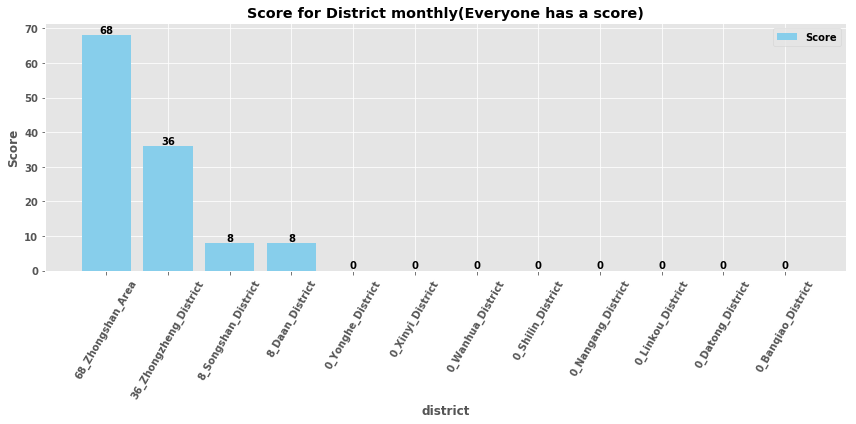

'05\n\n'

In [60]:
####################視覺化圖表####################
####################細節：每月各區域餐廳名次排名(前五名店家較有影響力)(20,16,12,8,4、其餘0分)####################

#print(df_03['美食所在區域'].value_counts())
#print(df_04['美食所在區域'].value_counts())
#print(df_05['美食所在區域'].value_counts())

####################取出同一區域所有名次####################
monthly_rating_03_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "中山區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_03_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "大安區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_03_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_03_district_Wanhua_District = pd.DataFrame({'Wanhua_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "萬華區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_03_district_Songshan_District = pd.DataFrame({'Songshan_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "松山區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_03_district_Nangang_District = pd.DataFrame({'Nangang_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "南港區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_03_district_Xinyi_District = pd.DataFrame({'Xinyi_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "信義區"]['評級'].to_frame().index.tolist())))))]})

monthly_rating_04_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "中山區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "大安區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Datong_District = pd.DataFrame({'Datong_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "大同區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Songshan_District = pd.DataFrame({'Songshan_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "松山區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Shilin_District = pd.DataFrame({'Shilin_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "士林區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Linkou_District = pd.DataFrame({'Linkou_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "林口區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Yonghe_District = pd.DataFrame({'Yonghe_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "永和區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Banqiao_District = pd.DataFrame({'Banqiao_District':[sum(list(map(ranking_to_Top5,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "板橋區"]['評級'].to_frame().index.tolist())))))]})

####################將同一區域的所有名次整合起來####################
monthly_rating_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':pd.concat([monthly_rating_03_district_Zhongzheng_District,monthly_rating_04_district_Zhongzheng_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Daan_District = pd.DataFrame({'Daan_District':pd.concat([monthly_rating_03_district_Daan_District,monthly_rating_04_district_Daan_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Songshan_District = pd.DataFrame({'Songshan_District':pd.concat([monthly_rating_03_district_Songshan_District,monthly_rating_04_district_Songshan_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':pd.concat([monthly_rating_03_district_Zhongshan_Area,monthly_rating_04_district_Zhongshan_Area],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Yonghe_District = pd.DataFrame({'Yonghe_District':pd.concat([monthly_rating_04_district_Yonghe_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Datong_District = pd.DataFrame({'Datong_District':pd.concat([monthly_rating_04_district_Datong_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Linkou_District = pd.DataFrame({'Linkou_District':pd.concat([monthly_rating_04_district_Linkou_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Nangang_District = pd.DataFrame({'Nangang_District':pd.concat([monthly_rating_03_district_Nangang_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Xinyi_District = pd.DataFrame({'Xinyi_District':pd.concat([monthly_rating_03_district_Xinyi_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Shilin_District = pd.DataFrame({'Shilin_District':pd.concat([monthly_rating_04_district_Shilin_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Wanhua_District = pd.DataFrame({'Wanhua_District':pd.concat([monthly_rating_03_district_Wanhua_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Banqiao_District = pd.DataFrame({'Banqiao_District':pd.concat([monthly_rating_04_district_Banqiao_District],ignore_index=True).cumsum().values[-1]})

data = [int(monthly_rating_district_Zhongzheng_District['Zhongzheng_District'].values),int(monthly_rating_district_Daan_District['Daan_District'].values),int(monthly_rating_district_Songshan_District['Songshan_District'].values),int(monthly_rating_district_Zhongshan_Area['Zhongshan_Area'].values),int(monthly_rating_district_Yonghe_District['Yonghe_District'].values),int(monthly_rating_district_Datong_District['Datong_District'].values),int(monthly_rating_district_Linkou_District['Linkou_District'].values),int(monthly_rating_district_Nangang_District['Nangang_District'].values),int(monthly_rating_district_Xinyi_District['Xinyi_District'].values),int(monthly_rating_district_Shilin_District['Shilin_District'].values),int(monthly_rating_district_Wanhua_District['Wanhua_District'].values),int(monthly_rating_district_Banqiao_District['Banqiao_District'].values)]
labels = ['Zhongzheng_District','Daan_District','Songshan_District','Zhongshan_Area','Yonghe_District','Datong_District','Linkou_District','Nangang_District','Xinyi_District','Shilin_District','Wanhua_District','Banqiao_District']
for i in range(0,len(data)):labels[i] = str(data[i])+"_"+str(labels[i])
labels = sorted(labels,key=natural_key,reverse = True)
data = sorted(data,reverse = True)
xlabellen = np.arange(len(data))

fig, ax = plt.subplots(figsize=(12,6))
plotbar = ax.bar(xlabellen,data, color='SkyBlue', label='Score')
for rect in plotbar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
ax.set_title('Score for District monthly(Everyone has a score)')
ax.set_xlabel('district')
ax.set_ylabel('Score')
ax.set_xticks(xlabellen)
ax.set_xticklabels(labels,rotation=60)
ax.legend()
plt.tight_layout()
plt.show()

'''03
中山區 Zhongshan_Area
大安區 Daan_District
中正區 Zhongzheng_District
萬華區 Wanhua_District
松山區 Songshan_District
南港區 Nangang_District
信義區 Xinyi_District
'''
'''04
中山區 Zhongshan_Area
大安區 Daan_District
中正區 Zhongzheng_District
大同區 Datong_District
松山區 Songshan_District
士林區 Shilin_District
林口區 Linkou_District
永和區 Yonghe_District
板橋區 Banqiao_District
'''
'''05

'''


# 各區域餐廳名次排名(前三名店家較有影響力)(20,14,7、其餘0分)：

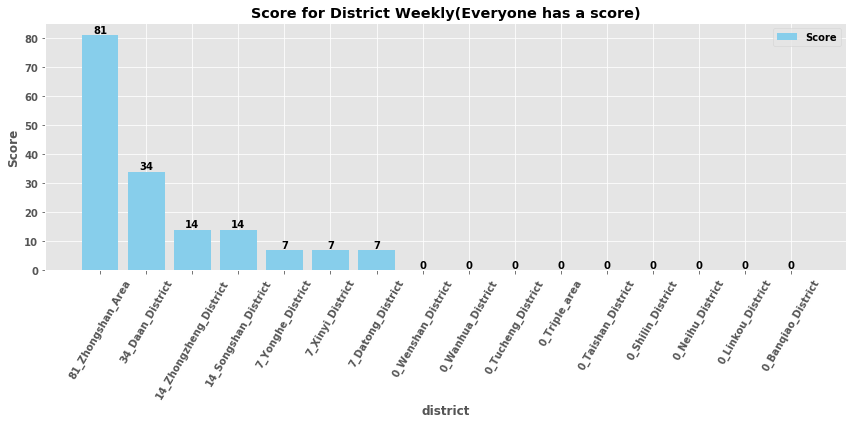

'\n0505_0511\n0512_0518\n0519_0525\n0526_0601\n'

In [61]:
####################視覺化圖表####################
####################細節：每週各區域餐廳名次排名(前三名店家較有影響力)(20,14,7、其餘0分)####################

#print(df_0331_0406['美食所在區域'].value_counts())
#print(df_0407_0413['美食所在區域'].value_counts())
#print(df_0414_0420['美食所在區域'].value_counts())
#print(df_0421_0427['美食所在區域'].value_counts())
#print(df_0428_0504['美食所在區域'].value_counts())
##print(df_0505_0511['美食所在區域'].value_counts())
##print(df_0512_0518['美食所在區域'].value_counts())
##print(df_0519_0525['美食所在區域'].value_counts())
##print(df_0526_0601['美食所在區域'].value_counts())

####################取出同一區域所有名次####################
weekly_rating_0331_0406_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "大安區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "中山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Datong_District = pd.DataFrame({'Datong_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "大同區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Songshan_District = pd.DataFrame({'Songshan_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "松山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Yonghe_District = pd.DataFrame({'Yonghe_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "永和區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Shilin_District = pd.DataFrame({'Shilin_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "士林區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0331_0406_district_Banqiao_District = pd.DataFrame({'Banqiao_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0331_0406[df_0331_0406['美食所在區域'] == "板橋區"]['評級'].to_frame().index.tolist())))))]})

weekly_rating_0407_0413_district_Shilin_District = pd.DataFrame({'Shilin_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "士林區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "中山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Triple_area = pd.DataFrame({'Triple_area':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "三重區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Xinyi_District = pd.DataFrame({'Xinyi_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "信義區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "大安區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Wanhua_District = pd.DataFrame({'Wanhua_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "萬華區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Datong_District = pd.DataFrame({'Datong_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "大同區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Yonghe_District = pd.DataFrame({'Yonghe_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "永和區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Tucheng_District = pd.DataFrame({'Tucheng_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "土城區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0407_0413_district_Banqiao_District = pd.DataFrame({'Banqiao_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0407_0413[df_0407_0413['美食所在區域'] == "板橋區"]['評級'].to_frame().index.tolist())))))]})

weekly_rating_0414_0420_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "中山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0414_0420_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "大安區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0414_0420_district_Songshan_District = pd.DataFrame({'Songshan_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "松山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0414_0420_district_Shilin_District = pd.DataFrame({'Shilin_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "士林區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0414_0420_district_Wanhua_District = pd.DataFrame({'Wanhua_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "萬華區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0414_0420_district_Datong_District = pd.DataFrame({'Datong_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "大同區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0414_0420_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0414_0420[df_0414_0420['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})

weekly_rating_0421_0427_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Datong_District = pd.DataFrame({'Datong_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Songshan_District = pd.DataFrame({'Songshan_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Neihu_District = pd.DataFrame({'Neihu_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Shilin_District = pd.DataFrame({'Shilin_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Wanhua_District = pd.DataFrame({'Wanhua_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Linkou_District = pd.DataFrame({'Linkou_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0421_0427_district_Wenshan_District = pd.DataFrame({'Wenshan_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0421_0427[df_0421_0427['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})

weekly_rating_0428_0504_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "大安區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "中山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Songshan_District = pd.DataFrame({'Songshan_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "松山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Datong_District = pd.DataFrame({'Datong_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "大同區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Xinyi_District = pd.DataFrame({'Xinyi_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "信義區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Taishan_District = pd.DataFrame({'Taishan_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "泰山區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Shilin_District = pd.DataFrame({'Shilin_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "士林區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
weekly_rating_0428_0504_district_Wenshan_District = pd.DataFrame({'Wenshan_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_0428_0504[df_0428_0504['美食所在區域'] == "文山區"]['評級'].to_frame().index.tolist())))))]})

###################將同一區域的所有名次整合起來####################
weekly_rating_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':pd.concat([weekly_rating_0331_0406_district_Zhongzheng_District,weekly_rating_0407_0413_district_Zhongzheng_District,weekly_rating_0414_0420_district_Zhongzheng_District,weekly_rating_0421_0427_district_Zhongzheng_District,weekly_rating_0428_0504_district_Zhongzheng_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Shilin_District = pd.DataFrame({'Shilin_District':pd.concat([weekly_rating_0331_0406_district_Shilin_District,weekly_rating_0407_0413_district_Shilin_District,weekly_rating_0414_0420_district_Shilin_District,weekly_rating_0421_0427_district_Shilin_District,weekly_rating_0428_0504_district_Shilin_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':pd.concat([weekly_rating_0331_0406_district_Zhongshan_Area,weekly_rating_0407_0413_district_Zhongshan_Area,weekly_rating_0414_0420_district_Zhongshan_Area,weekly_rating_0421_0427_district_Zhongshan_Area,weekly_rating_0428_0504_district_Zhongshan_Area],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Datong_District = pd.DataFrame({'Datong_District':pd.concat([weekly_rating_0331_0406_district_Datong_District,weekly_rating_0407_0413_district_Datong_District,weekly_rating_0414_0420_district_Datong_District,weekly_rating_0421_0427_district_Datong_District,weekly_rating_0428_0504_district_Datong_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Daan_District = pd.DataFrame({'Daan_District':pd.concat([weekly_rating_0331_0406_district_Daan_District,weekly_rating_0407_0413_district_Daan_District,weekly_rating_0414_0420_district_Daan_District,weekly_rating_0421_0427_district_Daan_District,weekly_rating_0428_0504_district_Daan_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Songshan_District = pd.DataFrame({'Songshan_District':pd.concat([weekly_rating_0331_0406_district_Songshan_District,weekly_rating_0414_0420_district_Songshan_District,weekly_rating_0421_0427_district_Songshan_District,weekly_rating_0428_0504_district_Songshan_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Wanhua_District = pd.DataFrame({'Wanhua_District':pd.concat([weekly_rating_0407_0413_district_Wanhua_District,weekly_rating_0414_0420_district_Wanhua_District,weekly_rating_0421_0427_district_Wanhua_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Xinyi_District = pd.DataFrame({'Xinyi_District':pd.concat([weekly_rating_0407_0413_district_Xinyi_District,weekly_rating_0428_0504_district_Xinyi_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Yonghe_District = pd.DataFrame({'Yonghe_District':pd.concat([weekly_rating_0331_0406_district_Yonghe_District,weekly_rating_0407_0413_district_Yonghe_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Wenshan_District = pd.DataFrame({'Wenshan_District':pd.concat([weekly_rating_0421_0427_district_Wenshan_District,weekly_rating_0428_0504_district_Wenshan_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Banqiao_District = pd.DataFrame({'Banqiao_District':pd.concat([weekly_rating_0331_0406_district_Banqiao_District,weekly_rating_0407_0413_district_Banqiao_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Neihu_District = pd.DataFrame({'Neihu_District':pd.concat([weekly_rating_0421_0427_district_Neihu_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Triple_area = pd.DataFrame({'Triple_area':pd.concat([weekly_rating_0407_0413_district_Triple_area],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Tucheng_District = pd.DataFrame({'Tucheng_District':pd.concat([weekly_rating_0407_0413_district_Tucheng_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Taishan_District = pd.DataFrame({'Taishan_District':pd.concat([weekly_rating_0428_0504_district_Taishan_District],ignore_index=True).cumsum().values[-1]})
weekly_rating_district_Linkou_District = pd.DataFrame({'Linkou_District':pd.concat([weekly_rating_0421_0427_district_Linkou_District],ignore_index=True).cumsum().values[-1]})

data = [int(weekly_rating_district_Zhongzheng_District['Zhongzheng_District'].values),int(weekly_rating_district_Shilin_District['Shilin_District'].values),int(weekly_rating_district_Zhongshan_Area['Zhongshan_Area'].values),int(weekly_rating_district_Datong_District['Datong_District'].values),int(weekly_rating_district_Daan_District['Daan_District'].values),int(weekly_rating_district_Songshan_District['Songshan_District'].values),int(weekly_rating_district_Wanhua_District['Wanhua_District'].values),int(weekly_rating_district_Xinyi_District['Xinyi_District'].values),int(weekly_rating_district_Yonghe_District['Yonghe_District'].values),int(weekly_rating_district_Wenshan_District['Wenshan_District'].values),int(weekly_rating_district_Banqiao_District['Banqiao_District'].values),int(weekly_rating_district_Neihu_District['Neihu_District'].values),int(weekly_rating_district_Triple_area['Triple_area'].values),int(weekly_rating_district_Tucheng_District['Tucheng_District'].values),int(weekly_rating_district_Taishan_District['Taishan_District'].values),int(weekly_rating_district_Linkou_District['Linkou_District'].values)]
labels = ['Zhongzheng_District','Shilin_District','Zhongshan_Area','Datong_District','Daan_District','Songshan_District','Wanhua_District','Xinyi_District','Yonghe_District','Wenshan_District','Banqiao_District','Neihu_District','Triple_area','Tucheng_District','Taishan_District','Linkou_District']
for i in range(0,len(data)):labels[i] = str(data[i])+"_"+str(labels[i])
labels = sorted(labels,key=natural_key,reverse = True)
data = sorted(data,reverse = True)
xlabellen = np.arange(len(data))

fig, ax = plt.subplots(figsize=(12,6))
plotbar = ax.bar(xlabellen,data, color='SkyBlue', label='Score')
for rect in plotbar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
ax.set_title('Score for District Weekly(Everyone has a score)')
ax.set_xlabel('district')
ax.set_ylabel('Score')
ax.set_xticks(xlabellen)
ax.set_xticklabels(labels,rotation=60)
ax.legend()
plt.tight_layout()
plt.show()

'''0331_0406
大安區 Daan_District
中正區 Zhongzheng_District
中山區 Zhongshan_Area
大同區 Datong_District
松山區 Songshan_District
永和區 Yonghe_District
士林區 Shilin_District
板橋區 Banqiao_District
'''
'''0407_0413
士林區 Shilin_District
中山區 Zhongshan_Area
三重區 Triple_area
信義區 Xinyi_District
大安區 Daan_District
萬華區 Wanhua_District
中正區 Zhongzheng_District
大同區 Datong_District
永和區 Yonghe_District
土城區 Tucheng_District
板橋區 Banqiao_District
'''
'''0414_0420
中山區 Zhongshan_Area
大安區 Daan_District
松山區 Songshan_District
士林區 Shilin_District
萬華區 Wanhua_District
大同區 Datong_District
中正區 Zhongzheng_District
'''
'''0421_0427
中山區 Zhongshan_Area
大同區 Datong_District
大安區 Daan_District
中正區 Zhongzheng_District
松山區 Songshan_District
內湖區 Neihu_District
士林區 Shilin_District
萬華區 Wanhua_District
林口區 Linkou_District
文山區 Wenshan_District
'''
'''0428_0504
大安區 Daan_District
中山區 Zhongshan_Area
松山區 Songshan_District
大同區 Datong_District
信義區 Xinyi_District
泰山區 Taishan_District
士林區 Shilin_District
中正區 Zhongzheng_District
文山區 Wenshan_District
'''
'''
0505_0511
0512_0518
0519_0525
0526_0601
'''


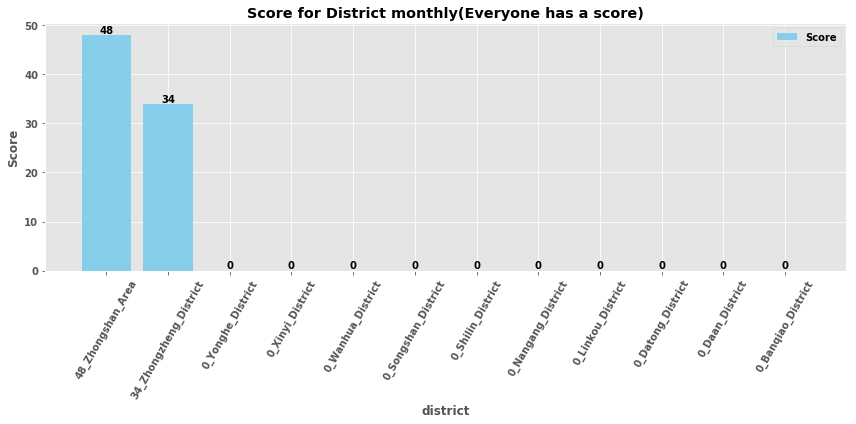

'05\n\n'

In [62]:
####################視覺化圖表####################
####################細節：每月各區域餐廳名次排名(前三名店家較有影響力)(20,14,7、其餘0分)####################

#print(df_03['美食所在區域'].value_counts())
#print(df_04['美食所在區域'].value_counts())
#print(df_05['美食所在區域'].value_counts())

####################取出同一區域所有名次####################
monthly_rating_03_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "中山區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_03_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "大安區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_03_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_03_district_Wanhua_District = pd.DataFrame({'Wanhua_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "萬華區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_03_district_Songshan_District = pd.DataFrame({'Songshan_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "松山區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_03_district_Nangang_District = pd.DataFrame({'Nangang_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "南港區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_03_district_Xinyi_District = pd.DataFrame({'Xinyi_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_03[df_03['美食所在區域'] == "信義區"]['評級'].to_frame().index.tolist())))))]})

monthly_rating_04_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "中山區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Daan_District = pd.DataFrame({'Daan_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "大安區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "中正區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Datong_District = pd.DataFrame({'Datong_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "大同區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Songshan_District = pd.DataFrame({'Songshan_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "松山區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Shilin_District = pd.DataFrame({'Shilin_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "士林區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Linkou_District = pd.DataFrame({'Linkou_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "林口區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Yonghe_District = pd.DataFrame({'Yonghe_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "永和區"]['評級'].to_frame().index.tolist())))))]})
monthly_rating_04_district_Banqiao_District = pd.DataFrame({'Banqiao_District':[sum(list(map(ranking_to_Top3,list(map(index_to_ranking,df_04[df_04['美食所在區域'] == "板橋區"]['評級'].to_frame().index.tolist())))))]})

####################將同一區域的所有名次整合起來####################
monthly_rating_district_Zhongzheng_District = pd.DataFrame({'Zhongzheng_District':pd.concat([monthly_rating_03_district_Zhongzheng_District,monthly_rating_04_district_Zhongzheng_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Daan_District = pd.DataFrame({'Daan_District':pd.concat([monthly_rating_03_district_Daan_District,monthly_rating_04_district_Daan_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Songshan_District = pd.DataFrame({'Songshan_District':pd.concat([monthly_rating_03_district_Songshan_District,monthly_rating_04_district_Songshan_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Zhongshan_Area = pd.DataFrame({'Zhongshan_Area':pd.concat([monthly_rating_03_district_Zhongshan_Area,monthly_rating_04_district_Zhongshan_Area],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Yonghe_District = pd.DataFrame({'Yonghe_District':pd.concat([monthly_rating_04_district_Yonghe_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Datong_District = pd.DataFrame({'Datong_District':pd.concat([monthly_rating_04_district_Datong_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Linkou_District = pd.DataFrame({'Linkou_District':pd.concat([monthly_rating_04_district_Linkou_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Nangang_District = pd.DataFrame({'Nangang_District':pd.concat([monthly_rating_03_district_Nangang_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Xinyi_District = pd.DataFrame({'Xinyi_District':pd.concat([monthly_rating_03_district_Xinyi_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Shilin_District = pd.DataFrame({'Shilin_District':pd.concat([monthly_rating_04_district_Shilin_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Wanhua_District = pd.DataFrame({'Wanhua_District':pd.concat([monthly_rating_03_district_Wanhua_District],ignore_index=True).cumsum().values[-1]})
monthly_rating_district_Banqiao_District = pd.DataFrame({'Banqiao_District':pd.concat([monthly_rating_04_district_Banqiao_District],ignore_index=True).cumsum().values[-1]})

data = [int(monthly_rating_district_Zhongzheng_District['Zhongzheng_District'].values),int(monthly_rating_district_Daan_District['Daan_District'].values),int(monthly_rating_district_Songshan_District['Songshan_District'].values),int(monthly_rating_district_Zhongshan_Area['Zhongshan_Area'].values),int(monthly_rating_district_Yonghe_District['Yonghe_District'].values),int(monthly_rating_district_Datong_District['Datong_District'].values),int(monthly_rating_district_Linkou_District['Linkou_District'].values),int(monthly_rating_district_Nangang_District['Nangang_District'].values),int(monthly_rating_district_Xinyi_District['Xinyi_District'].values),int(monthly_rating_district_Shilin_District['Shilin_District'].values),int(monthly_rating_district_Wanhua_District['Wanhua_District'].values),int(monthly_rating_district_Banqiao_District['Banqiao_District'].values)]
labels = ['Zhongzheng_District','Daan_District','Songshan_District','Zhongshan_Area','Yonghe_District','Datong_District','Linkou_District','Nangang_District','Xinyi_District','Shilin_District','Wanhua_District','Banqiao_District']
for i in range(0,len(data)):labels[i] = str(data[i])+"_"+str(labels[i])
labels = sorted(labels,key=natural_key,reverse = True)
data = sorted(data,reverse = True)
xlabellen = np.arange(len(data))

fig, ax = plt.subplots(figsize=(12,6))
plotbar = ax.bar(xlabellen,data, color='SkyBlue', label='Score')
for rect in plotbar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
ax.set_title('Score for District monthly(Everyone has a score)')
ax.set_xlabel('district')
ax.set_ylabel('Score')
ax.set_xticks(xlabellen)
ax.set_xticklabels(labels,rotation=60)
ax.legend()
plt.tight_layout()
plt.show()

'''03
中山區 Zhongshan_Area
大安區 Daan_District
中正區 Zhongzheng_District
萬華區 Wanhua_District
松山區 Songshan_District
南港區 Nangang_District
信義區 Xinyi_District
'''
'''04
中山區 Zhongshan_Area
大安區 Daan_District
中正區 Zhongzheng_District
大同區 Datong_District
松山區 Songshan_District
士林區 Shilin_District
林口區 Linkou_District
永和區 Yonghe_District
板橋區 Banqiao_District
'''
'''05

'''
